In [ ]:
# Data and package Import
#Data Source - Kaggle - https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import SARIMA
TempData = pd.read_csv('GlobalLandTemperaturesByCity.csv')
TempData.head(30)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E
9,1744-08-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [ ]:
#Data Cleaning
TempData = TempData.dropna()
df_Denamrk = TempData[TempData.Country == "Denmark"]

df_Denamrk.index = pd.to_datetime(df_Denamrk.dt)

df_Denamrk = df_Denamrk.drop(['dt','AverageTemperatureUncertainty'], axis=1)
df_Denamrk.describe()


,AverageTemperature
count,12664.000000
mean,7.802640
std,6.648288
min,-7.816000
25%,2.084000
50%,7.200000
75%,14.190500
max,21.437000


In [ ]:
ts = df_Denamrk['AverageTemperature']
ts

dt
1743-11-01     6.068
1744-04-01     5.788
1744-05-01    10.644
1744-06-01    14.051
1744-07-01    16.082
               ...  
2013-04-01     6.026
2013-05-01    12.774
2013-06-01    15.685
2013-07-01    18.735
2013-08-01    18.067
Name: AverageTemperature, Length: 12664, dtype: float64

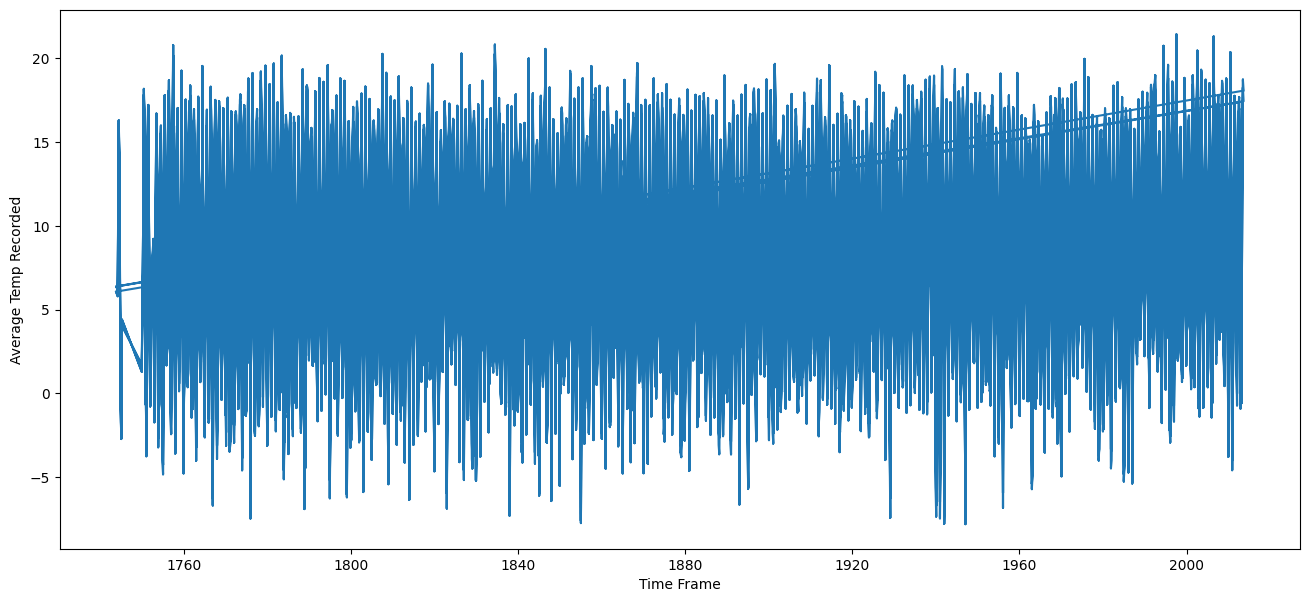

In [ ]:
#Data Exploration
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Time Frame')
ax1.set_ylabel('Average Temp Recorded')
ax1.plot(ts)


In [ ]:
from statsmodels.tsa.stattools import adfuller
#P IS GRETAER THAN 0.5 WE ACCEPT NULL HYPOTHESIS(DATA IS STATIONARY)
# Assuming you have a time series dataset stored in the variable 'ts'
# Perform Augmented Dickey-Fuller test on the time series data (ts)
adfuller_result = adfuller(ts, autolag='AIC')

# Print ADF Statistic
print(f'ADF Statistic: {adfuller_result[0]}')

# Print p-value
print(f'p-value: {adfuller_result[1]}')

# Print critical values
for key, value in adfuller_result[4].items():
    print('Critical Values:')
    print(f'   {key}, {value}')


ADF Statistic: -14.7644303918007
p-value: 2.3746970456352523e-27
Critical Values:
   1%, -3.430868192869495
Critical Values:
   5%, -2.86176901566292
Critical Values:
   10%, -2.566891900059256


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# Assuming 'ts' is your time series data
# Convert 'ts' to a pandas Series if it's not already in that format
ts = pd.Series(ts)

# Specify the order of the ARIMA model (p, d, q)
# Example: order=(p, d, q) where p is the number of AR terms, d is the number of differences, and q is the number of MA terms
order = (1, 1, 1)  # You can adjust these values based on your data and analysis

# Fit the ARIMA model
arima_model = ARIMA(ts, order=order)
arima_results = arima_model.fit()

# Generate predictions for a specific date range
# Example: '01/01/1990' to '01/01/1991'
start_date = '1990-01-01'
end_date = '1991-01-01'
predictions = arima_results.predict(start=start_date, end=end_date, dynamic=False)

# Print the predictions
print("Predictions:")
print(predictions)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

Predictions:
dt
1990-01-01     0.829829
1990-02-01     5.299781
1990-03-01     6.820787
1990-04-01     6.958828
1990-05-01     8.908373
1990-06-01    15.659122
1990-07-01    17.248528
1990-08-01    17.531806
1990-09-01    17.727863
1990-10-01     9.716547
1990-11-01     7.661407
1990-12-01     1.009122
1991-01-01     1.652141
Name: predicted_mean, dtype: float64


In [ ]:
actuals = df_Denamrk['01/01/1990': '01/01/1991']['AverageTemperature'][0:13]

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(actuals[0:13], predictions)
print('MAE: %f' % mae)

MAE: 1.629057
